4 - Linear Regression 

a)

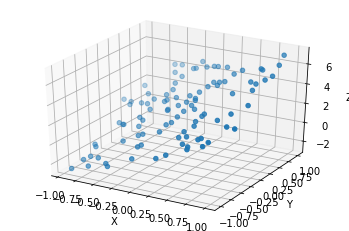

In [11]:
import numpy as np
from matplotlib import pyplot as plt

# Generating random uniform data.
X = np.random.uniform(-1,1,size = (100,2))

# Calculating the z-values.
mult = np.array([2,3])
zset = np.matmul(X,mult) + 1 + np.random.normal(0,1)

# Plotting the data.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(X[:,0], X[:,1], zset);
plt.show()


b)

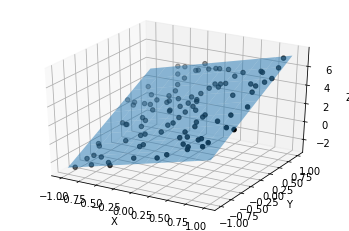


Best theta:  [[2.26863387]
 [2.        ]
 [3.        ]]


In [12]:
# Adding 1 for each data record for the bias.
n = X.shape[0]
int = np.ones(shape=zset.shape)[..., None]
Xbias = np.concatenate((int, X), 1)

# Calculating theta using normal equation.
zsetr = zset.reshape(n,1)
theta = np.matmul(np.linalg.inv(np.matmul(Xbias.T, Xbias)), np.matmul(Xbias.T, zsetr))

# Plotting both the data and the best fitting surface.
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
A,B = np.meshgrid(x,y)
Z=theta[1]*A + theta[2]*B + theta[0]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(X[:,0], X[:,1], zset,color="black");
surf = ax.plot_surface(A, B, Z, alpha=0.5)
plt.show()
print("\nBest theta: ", theta)

c)

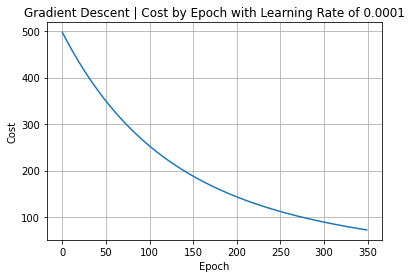

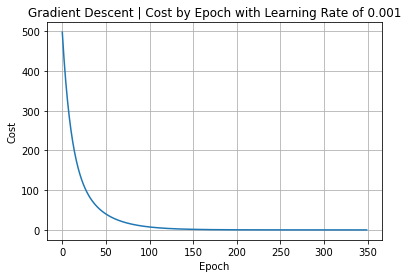

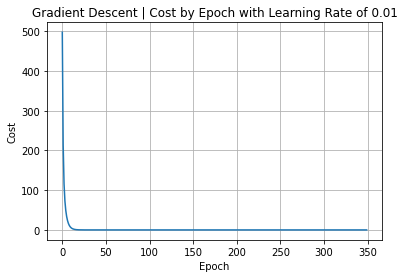

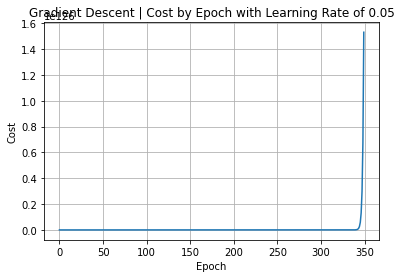

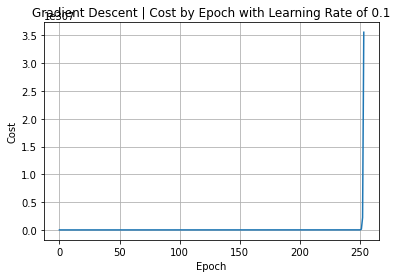

======================== RESULTS ========================
GD | Best model found with Learning Rate 0.01 on epoch 234
GD | Best bias:  2.26863386813103
GD | Best weights:  [2. 3.]
GD | Lowest cost found:  4.285271163459375e-29
Theta with normal equation:  [[2.26863387]
 [2.        ]
 [3.        ]]
Cost with normal equation:  2.3789086673071137e-29


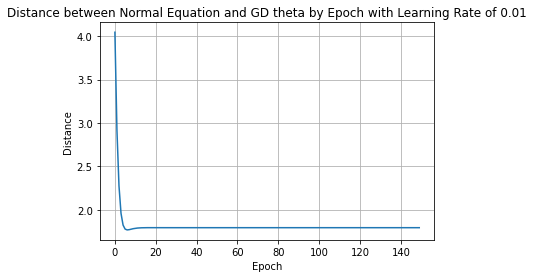

In [13]:
# Function to calculate Mean Squared Error/Loss Function.
def calculate_loss(weights,bias):
  zhat = np.dot(Xbias, np.insert(weights,0,bias))
  error = zhat - zset
  squared_error = np.dot(error, error)
  return squared_error / 2, error

# Initializing variables.
learning_rates = [0.0001,0.001,0.01,0.05,0.1]
epochs = 350 # This value could be adjusted or given as input for example
best_cost = float('inf')
best_bias = 0
best_weights = np.zeros(X.shape[1])

# Gradient Descent and Plotting for each Learning Rate.
for lr in learning_rates:
  losses = []
  all_epochs = []
  weights = np.zeros(X.shape[1])
  bias = 0
  for epoch in range(epochs):
    loss, error = calculate_loss(weights,bias)
    losses.append(loss)
    if loss < best_cost:
      best_cost = loss
      best_weights = weights
      best_bias = bias
      best_lr = lr
      best_epoch = epoch
    all_epochs.append(epoch)
    dw = 0.5 * np.dot(X.T,error)
    db = 0.5 * np.sum(error)
    weights -= lr * dw
    bias -= lr * db
  fig, ax = plt.subplots()
  ax.plot(all_epochs, losses)
  ax.set(xlabel='Epoch', ylabel='Cost', title='Gradient Descent | Cost by Epoch with Learning Rate of ' + str(lr))
  ax.grid()
  plt.show()
print("======================== RESULTS ========================")
print("GD | Best model found with Learning Rate %s on epoch %d" %(str(best_lr),best_epoch))
print("GD | Best bias: ", best_bias)
print("GD | Best weights: ", best_weights)
print("GD | Lowest cost found: ", best_cost)

print("Theta with normal equation: ", theta)
print("Cost with normal equation: ", calculate_loss([theta[1],theta[2]],theta[0])[0])

# Function to calculate distance between normal equation's and GD's solutions thetas.
def distance(analytic_solution, model_params):
    return np.linalg.norm(analytic_solution - model_params)

# Calculating and plotting the theta distance between normal equation and best learning rate found for GD.
weights = np.zeros(X.shape[1])
bias = 0
distances = []
for epoch in range(150):
  loss, error = calculate_loss(weights,bias)
  dw = np.dot(X.T,error)
  db = np.sum(error)
  weights -= best_lr * dw
  bias -= best_lr * db
  dist = np.insert(weights,0,bias)
  s = distance(dist,theta)
  distances.append(s)
fig, ax = plt.subplots()
ax.plot([x for x in range(150)], distances)
ax.set(xlabel='Epoch', ylabel='Distance', title='Distance between Normal Equation and GD theta by Epoch with Learning Rate of ' + str(best_lr))
ax.grid()
plt.show()
  

d)

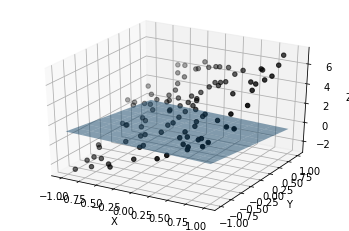

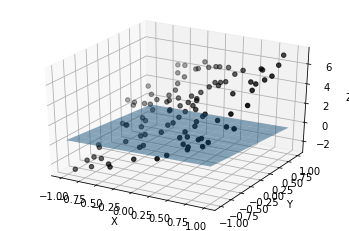

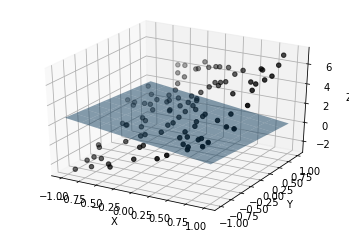

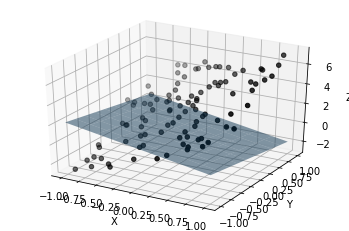

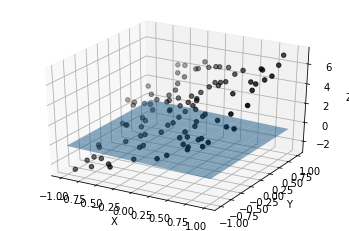

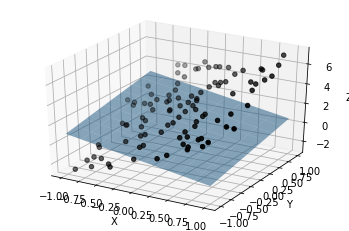

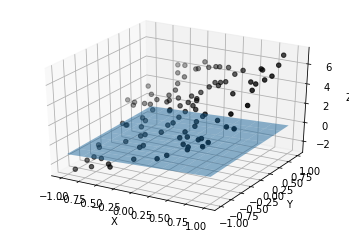

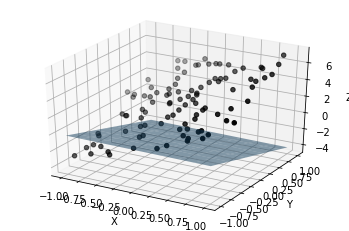

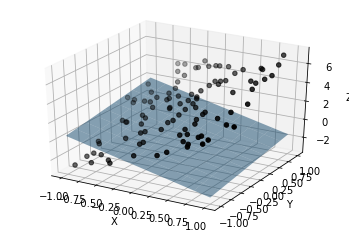

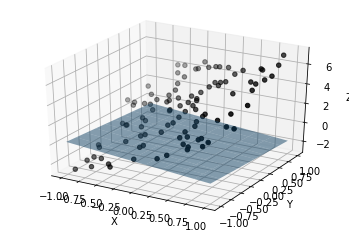

In [14]:
# Generating an array of 10 sampled thetas
thetas = [np.random.normal(0,1,3) for i in range(10)]

# Plotting 10 hyperplanes generated from the sampled thetas, along with the data generated from the original thetas in 4 a).
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
A,B = np.meshgrid(x,y)

for th in thetas:
  Z=th[1]*A + th[2]*B + th[0]
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.scatter3D(X[:,0], X[:,1], zset,color="black");
  surf = ax.plot_surface(A, B, Z, alpha=0.5)
  plt.show()

e)

######### Lambda: 0.1 #########
Normal equation:


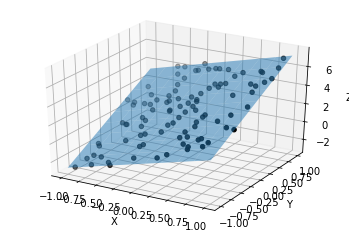


Best theta for normal equation:  [[2.27055842]
 [2.00628047]
 [3.00880471]]




/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


Gradient Descent:


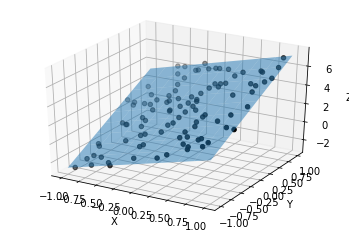


Best theta for gradient descent:  [2.26479007 1.98755851 2.98254614]
Learning rate:  0.01


######### Lambda: 0.5 #########
Normal equation:


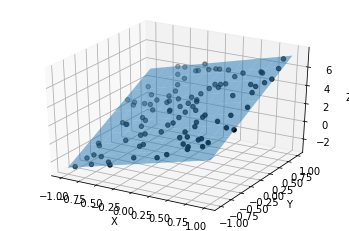


Best theta for normal equation:  [[2.278274  ]
 [2.03180968]
 [3.04455302]]


Gradient Descent:


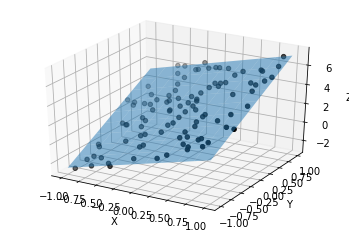


Best theta for gradient descent:  [2.24948758 1.93933046 2.91473918]
Learning rate:  0.01


######### Lambda: 1.0 #########
Normal equation:


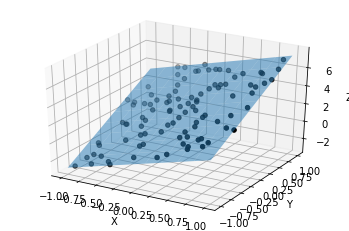


Best theta for normal equation:  [[2.28795645]
 [2.06466825]
 [3.09046607]]


Gradient Descent:


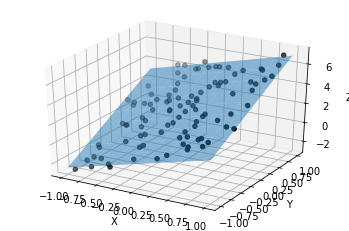


Best theta for gradient descent:  [2.23052993 1.88229603 2.83424659]
Learning rate:  0.01


######### Lambda: 3.0 #########
Normal equation:


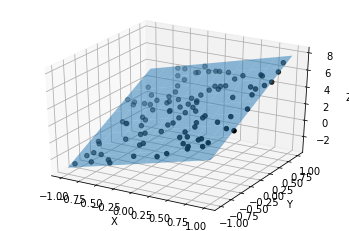


Best theta for normal equation:  [[2.32706631]
 [2.20771831]
 [3.28904483]]


Gradient Descent:


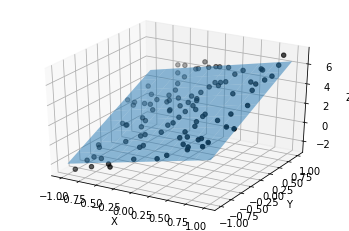


Best theta for gradient descent:  [2.15675542 1.6846233  2.55275394]
Learning rate:  0.01


######### Lambda: 5.0 #########
Normal equation:


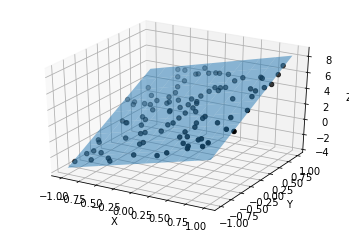


Best theta for normal equation:  [[2.3666506 ]
 [2.37258706]
 [3.51523834]]


Gradient Descent:


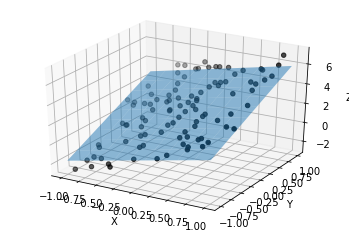


Best theta for gradient descent:  [2.08649219 1.52502892 2.32268335]
Learning rate:  0.01




In [15]:
# Initializing variables.
lambdas = [0.1,0.5,1,3,5]
learning_rates = [0.0001,0.001,0.01,0.05,0.1]
epochs = 350 # This value could be adjusted or given as input for example

# For each lambda, apply both normal equation and gradient descent, plotting and comparing the results.
for l in lambdas:
  print("######### Lambda: %.1f #########" %(l))
  best_lr = 0
  best_cost = float('inf')
  best_bias = 0
  best_weights = np.zeros(X.shape[1])
  # Calculating regularized theta using normal equation.
  theta_reg = np.matmul(np.linalg.inv(np.matmul(Xbias.T, Xbias) - l * np.identity(Xbias.shape[1])), np.matmul(Xbias.T, zsetr))

  # Plotting both the data and the best fitting surface.
  x = np.linspace(-1,1,10)
  y = np.linspace(-1,1,10)
  A,B = np.meshgrid(x,y)
  Z=theta_reg[1]*A + theta_reg[2]*B + theta_reg[0]
  print("Normal equation:")
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.scatter3D(X[:,0], X[:,1], zset,color="black");
  surf = ax.plot_surface(A, B, Z, alpha=0.5)
  plt.show()
  print("\nBest theta for normal equation: ", theta_reg)
  print("\n")

  for lr in learning_rates:
    weights = np.zeros(X.shape[1])
    bias = 0
    for epoch in range(epochs):
      loss, error = calculate_loss(weights,bias)
      if loss < best_cost:
        best_cost = loss
        best_weights = weights
        best_bias = bias
        best_lr = lr
      dw = np.dot(X.T,error) + 2 * l * weights
      db = np.sum(error) + 2 * l * bias
      weights -= lr * dw
      bias -= lr * db
  Z= best_weights[0]*A + best_weights[1]*B + best_bias
  print("Gradient Descent:")
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.scatter3D(X[:,0], X[:,1], zset,color="black");
  surf = ax.plot_surface(A, B, Z, alpha=0.5)
  plt.show()
  print("\nBest theta for gradient descent: ", np.insert(best_weights,0,best_bias))
  print("Learning rate: ", best_lr)
  print("\n")

